# Pandas 1

***

- ### Data wrangling, munging, tidying
- ### Pandas - wprowadzenie
- ### Wybór wierszy
- ### Iteracja
- ### Deduplikacja
- ### Przykład Data Wrangling

---
# 

# 

# 

# 

## Data Wrangling, Munging, Tidying 

# 

# 

![](img/road.jpg)

### Data Wrangling
- __Discovering__ - eksploracja danych
- __Structuring__ - przygotowanie danych
- __Cleaning__ - czyszczenie danych: unifikacja formatów, deduplikacja itd. itd.
- Enriching - wzbogacenie danych przez łączenie zbiorów
- Validating - sprawdzenie poprawności w kontekście danej dziedziny
- Publishing - udostępnienie

source: https://www.onlinewhitepapers.com/information-technology/six-core-data-wrangling-activities/

## Tidy Data

Wickham, Hadley - _"Tidy Data"_
https://www.jstatsoft.org/index.php/jss/article/view/v059i10/v59i10.pdf

- __Each variable you measure should be in one column.__
- __Each different observation of that variable should be in a different row.__
- There should be one table for each "kind" of variable.
- If you have multiple tables, they should include a column in the table that allows them to be linked.


---
# Pandas

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [1]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions',
                 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}

In [2]:
import pandas as pd

football = pd.DataFrame(data)
print (football)

   year     team  wins  losses
0  2010    Bears    11       5
1  2011    Bears     8       8
2  2012    Bears    10       6
3  2011  Packers    15       1
4  2012  Packers    11       5
5  2010    Lions     6      10
6  2011    Lions    10       6
7  2012    Lions     4      12


In [3]:
football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


In [ ]:
football.describe()

In [ ]:
football.dtypes

In [ ]:
football.head(2)

In [ ]:
football.tail()

In [ ]:
football.sample(5)

In [ ]:
football['year']

In [ ]:
football.year

In [ ]:
football[['year', 'team', 'wins']]

---

# Wybór wierszy

1. Slicing
2. Individual index (iloc / loc)
3. Boolean indexing
4. Kombinacja powyższych

### Slicing

In [ ]:
football

In [ ]:
football[3:5]

### Individual index

### Iloc
- An integer, e.g. `5`.
- A list or array of integers, e.g. `[4, 3, 0]`.
- A slice object with ints, e.g. `1:7`.
- A boolean array.
- A function

In [ ]:
football.iloc[[0,3]]

### Loc
- A single label
- A list or array of labels, e.g. `['a', 'b', 'c']`.
- A slice object with labels, e.g. `'a':'f'` <span style="color: cyan">__(WARNING - BOTH the start and the end ARE included)__</span>
- A boolean array
- A callable function 

In [ ]:
import numpy as np
import pandas as pd

index = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=['A', 'B', 'C'])
df

In [ ]:
df.loc['2000-01-03']

In [ ]:
df.loc[['2000-01-03', '2000-01-06', '2000-01-07' ]]

In [ ]:
df.loc['2000-01-03' : '2000-01-04'] 

### Boolean indexing

In [ ]:
football[football.wins > 10]

### Połączenie

In [ ]:
football

In [ ]:
football[(football.wins > 10) & (football.team == "Packers")]

In [ ]:
football[(football.wins > 10) | (football.team == "Packers")]

---
# Iteracja

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(pd.Series(range(10)).values.reshape(5, 2), columns = ['x', 'y'])
df

In [ ]:
for col in df.iteritems():
    print(col)

In [ ]:
for row in df.iterrows():
    print(row)

In [ ]:
for row in df.iterrows():
    print(row[1][0], row[1][1])

In [ ]:
data = []

for row in df.iterrows():
    x = row[1][0]
    y = row[1][1]
    data.append( [ x, y, x/y] )
df2 = pd.DataFrame(data, columns = ['x', 'y', 'ratio'])
df2

> ## <span style="color: red">Warning</span>
> Iterating through pandas objects is generally <span style="color: cyan">__slow__</span>. In many cases, iterating manually over the rows is not needed and can be avoided with one of the following approaches:
> - Look for a vectorized solution: many operations can be performed using built-in methods or NumPy functions, (boolean) indexing, …
> - When you have a function that cannot work on the full DataFrame/Series at once, it is better to use apply() instead of iterating over the values. See the docs on function application.
> - If you need to do iterative manipulations on the values but performance is important, consider writing the inner loop with cython or numba. See the enhancing performance section for some examples of this approach.
> 
> https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#iteration

### Nieźle - <span style="color: cyan">LIST COMPREHENSION</span>

In [ ]:
df2 = pd.DataFrame( (( row[1][0], row[1][1], row[1][0]/row[1][1]) for row in df.iterrows()), columns = ['x', 'y', 'ratio'])
df2

### Lepiej - <span style="color: cyan">APPLY</span>

In [ ]:
df2 = pd.DataFrame.copy(df)

In [ ]:
def ratio(row):
    print(row.iloc(0)[0])
    return row.x/row.y

df2['ratio'] = df2.apply(ratio, axis=1)
df2

### Najlepiej - <span style="color: cyan">Vectorization</span>

In [ ]:
df2 = pd.DataFrame.copy(df)

In [ ]:
df2['Total'] = df2.x / df2.y
df2

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(pd.Series(range(20_000)).values.reshape(10_000, 2), columns = ['x', 'y'])
df

In [ ]:
%%time
data = []

for row in df.iterrows():
    x = row[1][0]
    y = row[1][1]
    data.append( [ x, y, x/y] )
df2 = pd.DataFrame(data, columns = ['x', 'y', 'ratio'])

In [ ]:
%%time
data = []

for row in df.iterrows():
    data.append( [ row[1][0], row[1][1], row[1][0]/row[1][1]] )
df2 = pd.DataFrame(data, columns = ['x', 'y', 'ratio'])

In [ ]:
%%time
df2 = pd.DataFrame( [[ row[1][0], row[1][1], row[1][0]/row[1][1]] for row in df.iterrows()], columns = ['x', 'y', 'ratio'])

In [ ]:
df2 = pd.DataFrame.copy(df)

In [ ]:
%%time
def ratio(row):
    return row.x/row.y

df2['ratio'] = df2.apply(ratio, axis=1)

In [ ]:
df2 = pd.DataFrame.copy(df)

In [ ]:
%%time
df2['Total'] = df2.x / df2.y

---
# Deduplikacja

In [63]:
import pandas as pd
df = pd.DataFrame({"A":["foo", "foo", "foo", "bar"], "B":[0,1,1,1], "C":["A","A","B","A"]})
df

,A,B,C
0,foo,0,A
1,foo,1,A
2,foo,1,B
3,bar,1,A


In [64]:
df.drop_duplicates(subset=['A', 'C'], keep="first")

,A,B,C
0,foo,0,A
2,foo,1,B
3,bar,1,A


In [65]:
df.drop_duplicates(subset=['A', 'C'], keep="last")

,A,B,C
1,foo,1,A
2,foo,1,B
3,bar,1,A


In [66]:
df.drop_duplicates(subset=['A', 'C'], keep=False)

,A,B,C
2,foo,1,B
3,bar,1,A


In [67]:
df.drop_duplicates(subset=['A', 'C'], keep=False).reset_index(drop=True)

,A,B,C
0,foo,1,B
1,bar,1,A


---
# Przykład Data wrangling

In [68]:
import pandas as pd

url = 'data/blood.csv'

df_blood = pd.read_csv(url, sep = ',')
df_blood

,Unnamed: 0,Morning Sys,Morning Dia,Morning HB,Evening Sys,Evening Dia,Evening HB
0,2021-11-20,123.0,64.0,83.0,139.0,78.0,84.0
1,2021-11-21,NaN,NaN,NaN,132.0,81.0,82.0
2,2021-11-22,124.0,73.0,85.0,NaN,NaN,NaN
3,2021-11-23,128.0,82.0,81.0,146.0,83.0,93.0
4,2021-11-24,138.0,89.0,83.0,147.0,86.0,86.0
5,2021-11-25,125.0,77.0,95.0,147.0,93.0,81.0
6,2021-11-26,125.0,77.0,88.0,136.0,85.0,99.0
7,2021-11-27,121.0,74.0,99.0,153.0,91.0,93.0
8,2021-11-28,NaN,NaN,NaN,143.0,81.0,95.0
9,2021-11-29,143.0,85.0,90.0,153.0,77.0,103.0


In [69]:
columns = list(df_blood.columns)
columns

['Unnamed: 0',
 'Morning Sys',
 'Morning Dia',
 'Morning HB',
 'Evening Sys',
 'Evening Dia',
 'Evening HB']

In [70]:
columns[0] = 'Date'
df_blood.columns = columns

df_blood

,Date,Morning Sys,Morning Dia,Morning HB,Evening Sys,Evening Dia,Evening HB
0,2021-11-20,123.0,64.0,83.0,139.0,78.0,84.0
1,2021-11-21,NaN,NaN,NaN,132.0,81.0,82.0
2,2021-11-22,124.0,73.0,85.0,NaN,NaN,NaN
3,2021-11-23,128.0,82.0,81.0,146.0,83.0,93.0
4,2021-11-24,138.0,89.0,83.0,147.0,86.0,86.0
5,2021-11-25,125.0,77.0,95.0,147.0,93.0,81.0
6,2021-11-26,125.0,77.0,88.0,136.0,85.0,99.0
7,2021-11-27,121.0,74.0,99.0,153.0,91.0,93.0
8,2021-11-28,NaN,NaN,NaN,143.0,81.0,95.0
9,2021-11-29,143.0,85.0,90.0,153.0,77.0,103.0


In [71]:
df_blood.dtypes

Date            object
Morning Sys    float64
Morning Dia    float64
Morning HB     float64
Evening Sys    float64
Evening Dia    float64
Evening HB     float64
dtype: object

### Datetime columns

In [72]:
pd.to_datetime(df_blood.Date, format='%Y-%m-%d')

0    2021-11-20
1    2021-11-21
2    2021-11-22
3    2021-11-23
4    2021-11-24
5    2021-11-25
6    2021-11-26
7    2021-11-27
8    2021-11-28
9    2021-11-29
10   2021-11-30
11   2021-12-01
12   2021-12-02
13   2021-12-03
14   2021-12-04
15   2021-12-05
16   2021-12-06
17   2021-12-07
18   2021-12-08
19   2021-12-09
20   2021-12-10
Name: Date, dtype: datetime64[ns]

---
### How to `format`

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

---

In [73]:
pd.to_datetime(df_blood.Date, infer_datetime_format=True)

0    2021-11-20
1    2021-11-21
2    2021-11-22
3    2021-11-23
4    2021-11-24
5    2021-11-25
6    2021-11-26
7    2021-11-27
8    2021-11-28
9    2021-11-29
10   2021-11-30
11   2021-12-01
12   2021-12-02
13   2021-12-03
14   2021-12-04
15   2021-12-05
16   2021-12-06
17   2021-12-07
18   2021-12-08
19   2021-12-09
20   2021-12-10
Name: Date, dtype: datetime64[ns]

In [74]:
df_blood.Date = pd.to_datetime(df_blood.Date, format='%Y-%m-%d')

df_blood

,Date,Morning Sys,Morning Dia,Morning HB,Evening Sys,Evening Dia,Evening HB
0,2021-11-20,123.0,64.0,83.0,139.0,78.0,84.0
1,2021-11-21,NaN,NaN,NaN,132.0,81.0,82.0
2,2021-11-22,124.0,73.0,85.0,NaN,NaN,NaN
3,2021-11-23,128.0,82.0,81.0,146.0,83.0,93.0
4,2021-11-24,138.0,89.0,83.0,147.0,86.0,86.0
5,2021-11-25,125.0,77.0,95.0,147.0,93.0,81.0
6,2021-11-26,125.0,77.0,88.0,136.0,85.0,99.0
7,2021-11-27,121.0,74.0,99.0,153.0,91.0,93.0
8,2021-11-28,NaN,NaN,NaN,143.0,81.0,95.0
9,2021-11-29,143.0,85.0,90.0,153.0,77.0,103.0


In [75]:
df_blood.dtypes

Date           datetime64[ns]
Morning Sys           float64
Morning Dia           float64
Morning HB            float64
Evening Sys           float64
Evening Dia           float64
Evening HB            float64
dtype: object

In [76]:
df_blood['Morning Sys'].astype('Int64')

0      123
1     <NA>
2      124
3      128
4      138
5      125
6      125
7      121
8     <NA>
9      143
10    <NA>
11     149
12     114
13     111
14    <NA>
15    <NA>
16    <NA>
17    <NA>
18     127
19     127
20     114
Name: Morning Sys, dtype: Int64

In [77]:
df_blood.Date.dt.day

0     20
1     21
2     22
3     23
4     24
5     25
6     26
7     27
8     28
9     29
10    30
11     1
12     2
13     3
14     4
15     5
16     6
17     7
18     8
19     9
20    10
Name: Date, dtype: int64

In [78]:
df_blood.Date.dt.weekday

0     5
1     6
2     0
3     1
4     2
5     3
6     4
7     5
8     6
9     0
10    1
11    2
12    3
13    4
14    5
15    6
16    0
17    1
18    2
19    3
20    4
Name: Date, dtype: int64

### Categorical variables

In [79]:
df_blood.Date.dt.weekday.astype('category')  

0     5
1     6
2     0
3     1
4     2
5     3
6     4
7     5
8     6
9     0
10    1
11    2
12    3
13    4
14    5
15    6
16    0
17    1
18    2
19    3
20    4
Name: Date, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [80]:
df_blood['Day'] = df_blood.Date.dt.weekday.astype('category' )  

df_blood

,Date,Morning Sys,Morning Dia,Morning HB,Evening Sys,Evening Dia,Evening HB,Day
0,2021-11-20,123.0,64.0,83.0,139.0,78.0,84.0,5
1,2021-11-21,NaN,NaN,NaN,132.0,81.0,82.0,6
2,2021-11-22,124.0,73.0,85.0,NaN,NaN,NaN,0
3,2021-11-23,128.0,82.0,81.0,146.0,83.0,93.0,1
4,2021-11-24,138.0,89.0,83.0,147.0,86.0,86.0,2
5,2021-11-25,125.0,77.0,95.0,147.0,93.0,81.0,3
6,2021-11-26,125.0,77.0,88.0,136.0,85.0,99.0,4
7,2021-11-27,121.0,74.0,99.0,153.0,91.0,93.0,5
8,2021-11-28,NaN,NaN,NaN,143.0,81.0,95.0,6
9,2021-11-29,143.0,85.0,90.0,153.0,77.0,103.0,0


In [81]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_blood.Day.cat.categories = days

In [82]:
df_blood

,Date,Morning Sys,Morning Dia,Morning HB,Evening Sys,Evening Dia,Evening HB,Day
0,2021-11-20,123.0,64.0,83.0,139.0,78.0,84.0,Saturday
1,2021-11-21,NaN,NaN,NaN,132.0,81.0,82.0,Sunday
2,2021-11-22,124.0,73.0,85.0,NaN,NaN,NaN,Monday
3,2021-11-23,128.0,82.0,81.0,146.0,83.0,93.0,Tuesday
4,2021-11-24,138.0,89.0,83.0,147.0,86.0,86.0,Wednesday
5,2021-11-25,125.0,77.0,95.0,147.0,93.0,81.0,Thursday
6,2021-11-26,125.0,77.0,88.0,136.0,85.0,99.0,Friday
7,2021-11-27,121.0,74.0,99.0,153.0,91.0,93.0,Saturday
8,2021-11-28,NaN,NaN,NaN,143.0,81.0,95.0,Sunday
9,2021-11-29,143.0,85.0,90.0,153.0,77.0,103.0,Monday


In [83]:
df = df_blood.set_index('Date', drop=True)
df

,Morning Sys,Morning Dia,Morning HB,Evening Sys,Evening Dia,Evening HB,Day
Date,,,,,,,
2021-11-20,123.0,64.0,83.0,139.0,78.0,84.0,Saturday
2021-11-21,NaN,NaN,NaN,132.0,81.0,82.0,Sunday
2021-11-22,124.0,73.0,85.0,NaN,NaN,NaN,Monday
2021-11-23,128.0,82.0,81.0,146.0,83.0,93.0,Tuesday
2021-11-24,138.0,89.0,83.0,147.0,86.0,86.0,Wednesday
2021-11-25,125.0,77.0,95.0,147.0,93.0,81.0,Thursday
2021-11-26,125.0,77.0,88.0,136.0,85.0,99.0,Friday
2021-11-27,121.0,74.0,99.0,153.0,91.0,93.0,Saturday
2021-11-28,NaN,NaN,NaN,143.0,81.0,95.0,Sunday


In [88]:
df["Morning Sys"].fillna(df["Morning Sys"].mean())

Date
2021-11-20    123.000000
2021-11-21    126.357143
2021-11-22    124.000000
2021-11-23    128.000000
2021-11-24    138.000000
2021-11-25    125.000000
2021-11-26    125.000000
2021-11-27    121.000000
2021-11-28    126.357143
2021-11-29    143.000000
2021-11-30    126.357143
2021-12-01    149.000000
2021-12-02    114.000000
2021-12-03    111.000000
2021-12-04    126.357143
2021-12-05    126.357143
2021-12-06    126.357143
2021-12-07    126.357143
2021-12-08    127.000000
2021-12-09    127.000000
2021-12-10    114.000000
Name: Morning Sys, dtype: float64

In [62]:
df.fillna(method='ffill', inplace=True)

df

,Morning Sys,Morning Dia,Morning HB,Evening Sys,Evening Dia,Evening HB,Day
Date,,,,,,,
2021-11-20,123.0,64.0,83.0,139.0,78.0,84.0,Saturday
2021-11-21,123.0,64.0,83.0,132.0,81.0,82.0,Sunday
2021-11-22,124.0,73.0,85.0,132.0,81.0,82.0,Monday
2021-11-23,128.0,82.0,81.0,146.0,83.0,93.0,Tuesday
2021-11-24,138.0,89.0,83.0,147.0,86.0,86.0,Wednesday
2021-11-25,125.0,77.0,95.0,147.0,93.0,81.0,Thursday
2021-11-26,125.0,77.0,88.0,136.0,85.0,99.0,Friday
2021-11-27,121.0,74.0,99.0,153.0,91.0,93.0,Saturday
2021-11-28,121.0,74.0,99.0,143.0,81.0,95.0,Sunday


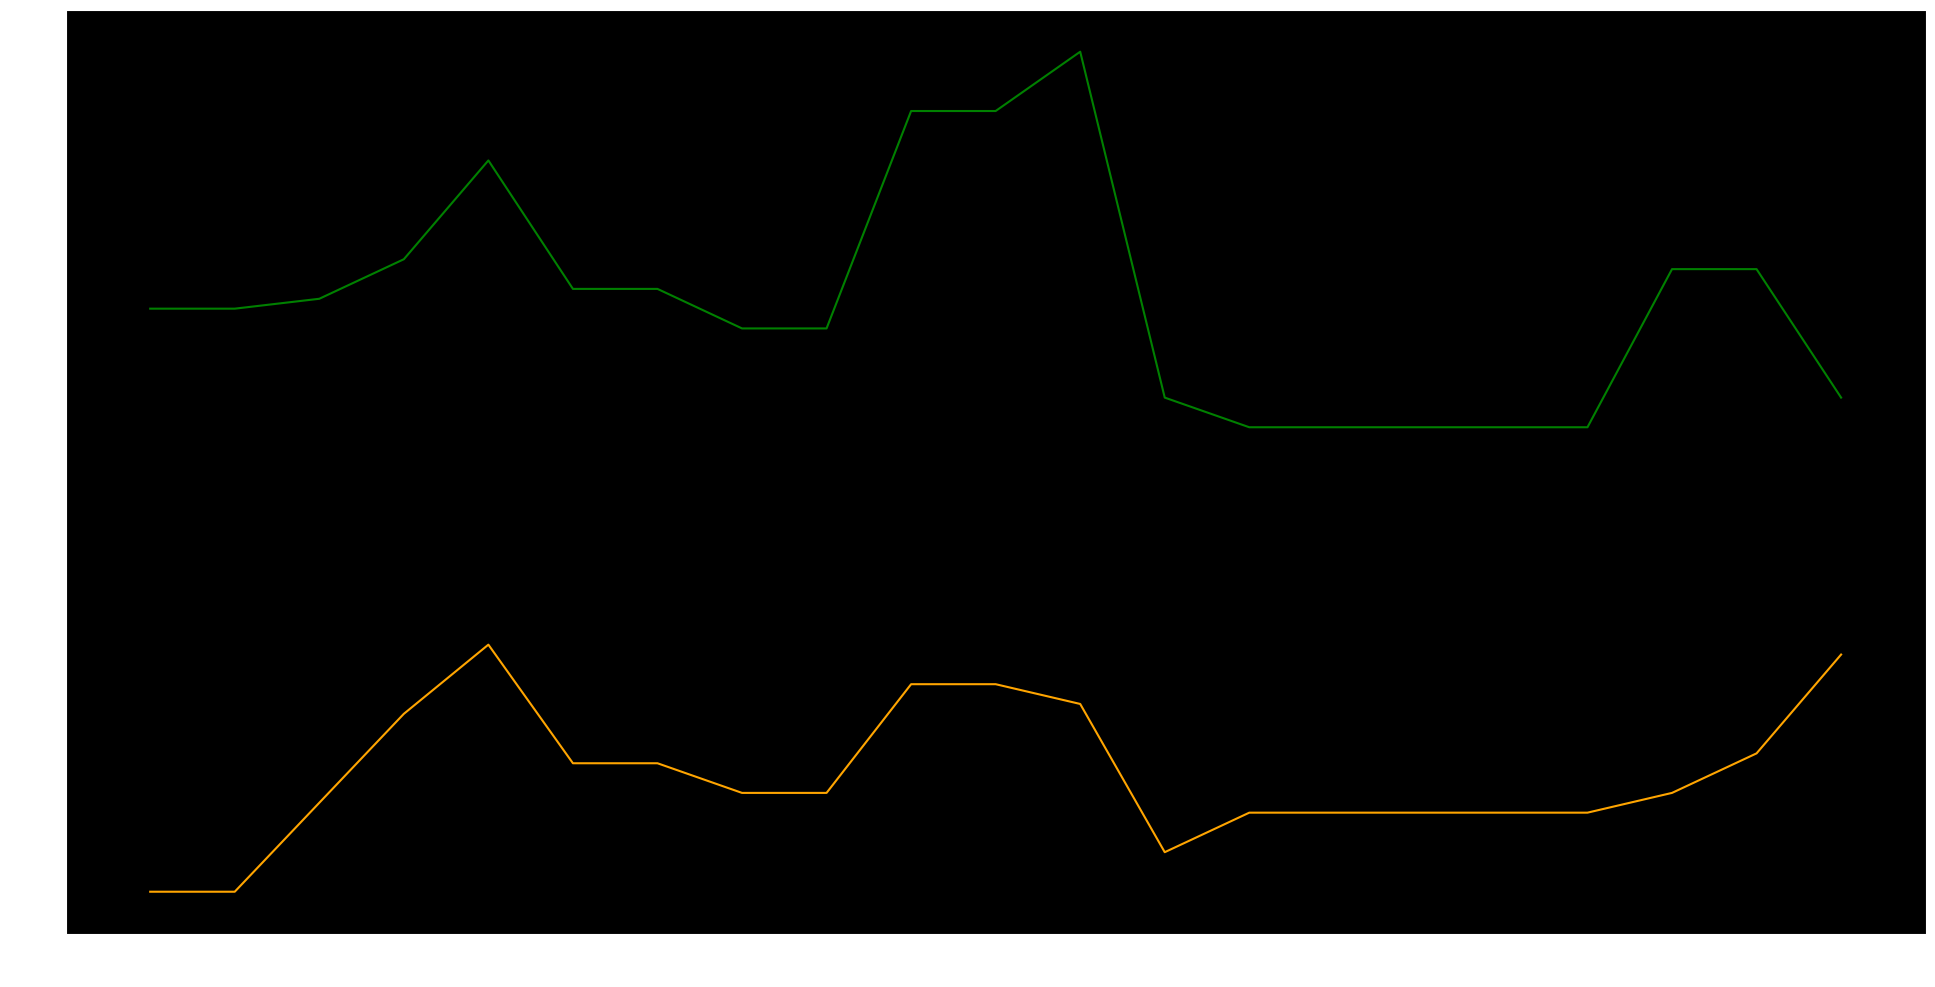

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize=(24,12))
plt.style.use("dark_background")

chart = sns.lineplot(x='Date',
                     y='Morning Dia',
                     color='orange', 
                     data=df
                    )
chart = sns.lineplot(x='Date',
                     y='Morning Sys',
                     color='green', 
                     data=df
                    )

## Średnie kroczące

In [ ]:
df["rolling Morning Dia"] = df["Morning Dia"].rolling(5).mean()
df["rolling Morning Sys"] = df["Morning Sys"].rolling(5).mean()

In [ ]:
df

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.dates as mdates

plt.figure(figsize=(24,12))
plt.style.use("dark_background")
chart = sns.lineplot(x='Date',
                     y='Morning Sys', 
                     color='orange', 
                     linestyle='--',
                     data=df
                    )
chart = sns.lineplot(x='Date',
                     y='Morning Dia',
                     color='green', 
                     linestyle='--',
                     data=df,
                    )
chart = sns.lineplot(x='Date',
                     y='rolling Morning Sys',
                     color='yellow', 
                     data=df
                    )
chart = sns.lineplot(x='Date',
                     y='rolling Morning Dia',
                     color='cyan', 
                     data=df
                    )